In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait # available since 2.4.0
from selenium.webdriver.support import expected_conditions as EC # available since 2.26.0
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_e.csv')
df['win'] = -99
df.head()

,home,away,line,draft_kings,diff,score,date,win
0,Georgetown,Villanova,-15.0,-11.5,3.5,-13,12/11/2020,-99
1,Charleston,South Carolina St.,23.0,19.5,3.5,27,12/11/2020,-99
2,West Virginia,North Texas,15.0,12.0,3.0,12,12/11/2020,-99
3,Iowa,Iowa St.,11.0,13.5,2.5,28,12/11/2020,-99
4,Canisius,Marist,6.0,3.5,2.5,9,12/11/2020,-99


In [3]:
for index, row in df.iterrows():
    line = row['line']
    dk = row['draft_kings']
    score = row['score']
    win = -99
    if line > dk:
        if score > dk:
            win = 1
        elif score < dk:
            win = 0
        else:
            win = 2
    elif line < dk:
        if score < dk:
            win = 1
        elif score > dk:
            win = 0
        else:
            win = 2
    else:
        win = 2
    
    
    df.loc[index,'win'] = win

In [4]:
df.sort_values(by=['diff'], ascending = False)

,home,away,line,draft_kings,diff,score,date,win
16,BYU,Utah,-5.0,2.0,7.0,18,12/12/2020,0
18,Auburn,Memphis,-1.0,-6.5,5.5,3,12/12/2020,1
17,Eastern Illinois,Western Illinois,18.0,12.5,5.5,4,12/12/2020,0
19,IUPUI,Tennessee St.,7.0,2.0,5.0,3,12/12/2020,1
20,Ball St.,Illinois St.,9.0,5.0,4.0,16,12/12/2020,1
...,...,...,...,...,...,...,...,...
55,Tennessee,Cincinnati,7.0,7.0,0.0,9,12/12/2020,2
56,Denver,Dixie St.,3.0,3.0,0.0,-3,12/12/2020,2
57,Utah Valley,Wyoming,-7.0,-7.0,0.0,-5,12/12/2020,2
64,Creighton,Marquette,7.0,7.0,0.0,-5,2020/12/14,2


In [10]:
df['win'].value_counts(sort = False)

0    28
1    31
2     7
Name: win, dtype: int64

In [11]:
df_3 = df[df['diff'] > 3.5]

In [12]:
df_3['win'].value_counts(sort = False)

0    2
1    3
Name: win, dtype: int64

In [13]:
win = []
loss = []
index = []
for i in range(0,20):
    x = i/2
    df_new = df[df['diff'] > x]
    series = df_new['win'].value_counts(sort = False)
    
    index.append(x)
    try:
        win.append(series[1])
    except:
        win.append(0)
    try:
        loss.append(series[0])
    except:
        loss.append(0)

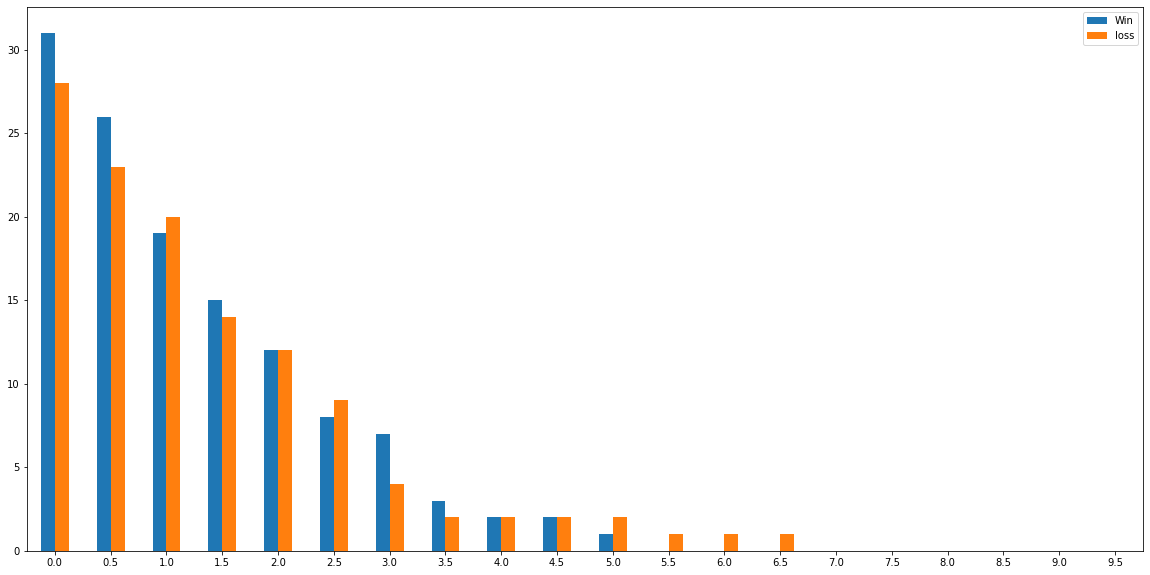

In [14]:
plot = pd.DataFrame({'Win': win,
                   'loss': loss}, index=index)
ax = plot.plot.bar(rot=0, figsize=(20,10))